# 1. Random Forest - Ensemble of Decision Trees 

In [4]:
# 1. scikit-learn에서 iris 꽃잎 데이터 가져오기

# import data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_validate

# 경고가 나와도 무하고 진행
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.simplefilter(action = 'ignore', category=DeprecationWarning)

# 모델 성능 확인 위한 기법
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, log_loss)

In [5]:
# sklearn에 있는 함수를 사용하여 데이터 셋을 split
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)

list(zip(X[:5], y[:5]))

[(array([5.1, 3.5, 1.4, 0.2]), 0),
 (array([4.9, 3. , 1.4, 0.2]), 0),
 (array([4.7, 3.2, 1.3, 0.2]), 0),
 (array([4.6, 3.1, 1.5, 0.2]), 0),
 (array([5. , 3.6, 1.4, 0.2]), 0)]

<h1> Step 1 - 검증을 위해 데이터셋 training과 testing set으로 분리 </h1>

In [6]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=777)

<h1> Step 2 & 3 - Validation 할 hyperparameters 찾기 </h1>

In [7]:
from sklearn.ensemble import RandomForestClassifier

# 한 모델 정의
clf = RandomForestClassifier()

# Set a search range
parameters = {'n_estimators' : [100, 150, 200],
              'criterion' : ['gini', 'entropy']}
# Find the best hyperparameters using GridSearchCV
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr, y_tr)

print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# 최적 모델이 best_clf에 저장됨
best_clf = gridsearch.best_estimator_
best_clf

gridsearch.best_params_ = {'criterion': 'gini', 'n_estimators': 100}


RandomForestClassifier()

In [8]:
best_clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

<h1> Step 4. 예측 정확도 계산 </h1>

In [9]:
y_pred = best_clf.predict(X_ts)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

test_acc = 0.95


<h1> Step 5. train과 test data 모두 학습해서 최종 배포용 모델 만들기

In [10]:
final_model = RandomForestClassifier(**gridsearch.best_params_)
final_model.fit(X, y)

RandomForestClassifier()

# 2. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# 데이터 가져오기
X, y = load_iris(return_X_y=True)

# Step 1 : Get training and testing datasets
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=777)

# 정규화
normalizer = MinMaxScaler(feature_range=(0,1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)

# show
print("Before normalization:\n", X_tr[:5])
print("After normalization:\n", X_tr_normalized[:5])

# Step 2 & 3 : Validation 할 hyperparameters 찾기
clf = LogisticRegression(max_iter=5000)
parameters = {'penalty': ['l2'],
              'C': [10e-5, 10e-3, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e5]}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr_normalized, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

best_clf = gridsearch.best_estimator_

# Step 4 : Get best model performance
y_pred = best_clf.predict(X_ts_normalized)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')


Before normalization:
 [[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [4.6 3.1 1.5 0.2]
 [4.8 3.1 1.6 0.2]
 [4.5 2.3 1.3 0.3]]
After normalization:
 [[0.34375    0.16666667 0.46296296 0.375     ]
 [0.59375    0.33333333 0.72222222 0.58333333]
 [0.0625     0.45833333 0.05555556 0.04166667]
 [0.125      0.45833333 0.07407407 0.04166667]
 [0.03125    0.125      0.01851852 0.08333333]]
gridsearch.best_params_ = {'C': 100.0, 'penalty': 'l2'}
test_acc = 0.9833333333333333


# Benchmark

1. Dataset

Text(0, 0.5, '$x_2$')

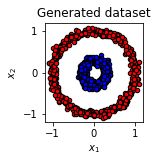

In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, factor=.3, noise=.05)

# Show the dataset
# 아래 코드는 데이터를 시각화 하기 위한 코드이다.
# 아래의 figure을 통해 시각화 하기위한 공간을 만들고, subplot은 여러개의 시각화 공간을 만드는 함수이다.
plt.figure()
# nrows=2, ncols=2, index=1 이라고 생각할 수 있다.
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Generated dataset") # title을 지정 할 수 있다.
reds = y == 0 # true, false로 red에 저장됨.
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k') # scatter 함수을 이용해 이제 데이터를 표현할 수 있다. 순서대로 x축, y축좌표,c= 점의색, s=size
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.xlabel("$x_1$") # x축 label
plt.ylabel("$x_2$") # y축 label

In [12]:
# Step 1: Get training and testing datasets
# data를 split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=777)

# Data normalization
# data normalization하고
normalizer = MinMaxScaler(feature_range=(0, 1))
normalizer.fit(X_tr)
X_tr_normalized = normalizer.transform(X_tr)
X_ts_normalized = normalizer.transform(X_ts)

# LogisticRegression의 하이퍼 파라미터를 구하고, 모델을 만들어 예측까지 하는 함수이며 위에서 설명한 것과 동일하다.
# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = LogisticRegression(max_iter=5000)
parameters = {'penalty': ['l2'],
              'C': [10e-5, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e5]}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr_normalized, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_ts_normalized)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

gridsearch.best_params_ = {'C': 100.0, 'penalty': 'l2'}
test_acc = 0.9833333333333333


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy']} # 불순도를 구하는 파라미터 찾기
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
gridsearch.fit(X_tr, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_ts)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

gridsearch.best_params_ = {'criterion': 'gini'}
test_acc = 0.9333333333333333


In [14]:
from sklearn.ensemble import RandomForestClassifier

# 위에처럼 하이퍼 파라미터 구하고 accuary까지 구한다.
# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = RandomForestClassifier()
parameters = {'n_estimators': [50, 100, 150, 200],
              'criterion': ['gini', 'entropy']}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)

gridsearch.fit(X_tr, y_tr)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_ts)
test_acc = accuracy_score(y_ts, y_pred)
print(f'test_acc = {test_acc}')

gridsearch.best_params_ = {'criterion': 'gini', 'n_estimators': 50}
test_acc = 0.9333333333333333


**Q: 세 모델의 예측 성능이 각각 어떻게 나타나나요? 주어진 데이터셋에 대하여, logistic regression, decision tree, random forest 중 어떤 모델이 더 적합할까요? 우리의 논의를 바탕으로, 이러한 성능 차이를 설명할 수 있나요?**